In [1]:
import numpy as np
import scipy as sp
import scipy.interpolate as interp
import sys,json,os
sys.path.append('../..')
import matplotlib.pyplot as plt
import Project.profiles as pp
import Project.new_profiles as pnp
import Project.plot_assist as pa
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'

In [2]:
dmo = json.load(open('../../sim_RC_12/Output/resdicts/dmo_sim_dict.json','r'))
bry = json.load(open('../../sim_RC_12/Output/resdicts/Bry_2sig_dict.json','r'))
bry_1 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_1sig_dict.json','r'))
bry_p5 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_p5sig_dict.json','r'))

In [3]:
for gal in dmo:
    dmo[gal]['core_fit'] = dmo[gal]['sidm_fit']
    dmo[gal]['cusp_fit'] = dmo[gal]['nfw_fit']

In [4]:
LM = np.zeros([15,15])
RN = np.zeros([15,15])
for lm_i in range(15):
    for rn_i in range(15):
        LM[lm_i,rn_i] = lm_i
        RN[lm_i,rn_i] = 14-rn_i
masses = np.array([9.0,9.3,9.6,9.9,10.2,10.5,10.8,11.1,11.4,11.7,12.0,12.3,12.6,12.9,13.2,13.5])
radius = np.array([0.2,0.4,0.6,0.8,1.0,1.4,1.8,2.2,2.6,3.0,3.4,3.8,4.2,4.6,5.0,5.4])
mass = 0.5*(masses[:-1]+masses[1:])
rad = 0.5*(radius[:-1]+radius[1:])
new_radius = [radius[-i-1] for i in range(len(radius))]
data = [[(1.,1.,1.) for i in range(16)] for i in range(16)]

In [5]:
def get_axes(wspace = 0.2):
    fig,axs = plt.subplots(1,2, figsize = (10,5),gridspec_kw = {'wspace':wspace})
    for ax in axs:
        ax.imshow(data, alpha = 0.)
        ax.set_xticks(np.arange(-0.5,15.5,1))
        ax.set_xticklabels(masses,rotation = 45)
        ax.set_yticks(np.arange(-0.5,15.5,1))
        ax.set_yticklabels(new_radius)
        ax.tick_params(axis = 'both',direction = 'in',right = True,top = True, width = 1,length = 4)
        ax.grid(ls = '-',color = 'grey',alpha = 0.2)
        ax.set_xlabel('log($\mathrm{M_{200}/M_{\odot}}$)',size = 13)
        ax.set_ylabel('$r_{\:\mathrm{last}}\:/\:r_s$',size = 15)
        ax.set_ylim(14.5,-0.5)
        ax.set_xlim(-0.5,14.5)
    axs[0].set_title('Input: CUSP', color = pa.green)
    axs[1].set_title('Input: CORE', color = pa.purple)
    return fig,axs[0],axs[1]

In [6]:
def get_bf(gald,Ngals):
    lnz_n = np.zeros([15,15,Ngals])
    lnz_c = np.zeros([15,15,Ngals])
    for lm_i in range(15):
        for rn_i in range(15):
            for i in range(Ngals):
                for model in ['N','S']:
                    gal = '%i_%i_%s_gal_%i'%(lm_i,rn_i,model,i)
                    dlnz = gald[gal]['core_fit']['lnZ'] - gald[gal]['cusp_fit']['lnZ']
                    if model == 'N':
                        lnz_n[lm_i,rn_i,i] = dlnz
                    elif model == 'S':
                        lnz_c[lm_i,rn_i,i] = dlnz
    return lnz_n,lnz_c

min,max of all i/p cusp :  -172.37 71.27
min,max of all i/p core :  -2.96 10563.54
----------------------------
min,max of mean i/p cusp :  -9.12 0.17
min,max of mean i/p core :  14.8 529.08


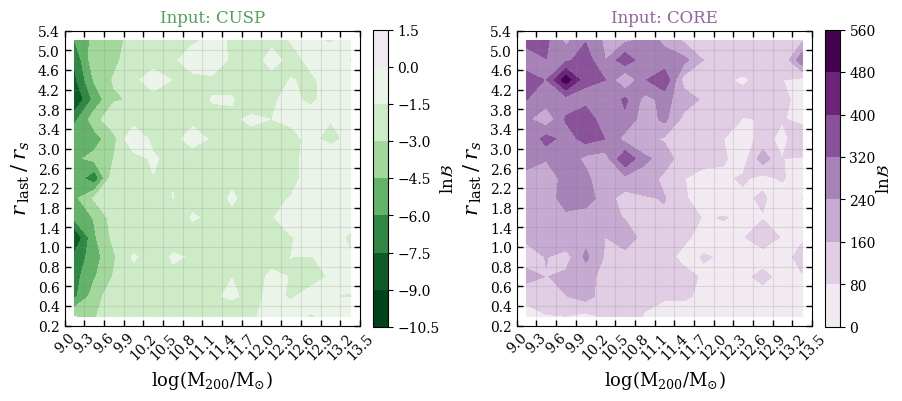

In [91]:
fig,ax1,ax2 = get_axes(0.4)
lnz_n,lnz_c = get_bf(bry,50)
print ('min,max of all i/p cusp : ',np.around(np.min(lnz_n),2), np.around(np.max(lnz_n),2))
print ('min,max of all i/p core : ',np.around(np.min(lnz_c),2), np.around(np.max(lnz_c),2))
print ('----------------------------')
bfn = np.mean(lnz_n,axis = 2).copy()
print ('min,max of mean i/p cusp : ',np.around(np.min(bfn),2),np.around(np.max(bfn),2))
cn = ax1.contourf(LM,RN,bfn, cmap = pa.prgn_r,vmin = np.min(bfn), vmax = np.abs(np.min(bfn)))
cb = fig.colorbar(cn, ax = ax1, fraction = 0.046, pad = 0.04)
cb.set_label('$\mathrm{ln}\mathcal{B}$',size = 12,labelpad = 0)

bfs = np.mean(lnz_c,axis = 2).copy()
print ('min,max of mean i/p core : ',np.around(np.min(bfs),2),np.around(np.max(bfs),2))
# levels = [50,100,200,400,500,600,1000,2000]
cn = ax2.contourf(LM,RN,bfs, cmap = pa.prgn_r,vmin = -np.max(bfs), vmax = np.max(bfs))
cb = fig.colorbar(cn, ax = ax2, fraction = 0.046, pad = 0.04,extend = 'both')
# cb.set_ticks(levels)
cb.set_label('$\mathrm{ln}\mathcal{B}$',size = 12,labelpad = 0)
plt.savefig('../Output/reliability/BRY_mean_lnB_ensemble.pdf',bbox_inches = 'tight',dpi = 300)

min,max of all i/p cusp :  -124.61 135.32
min,max of all i/p core :  -0.41 25818.39
----------------------------
min,max of mean i/p cusp :  -11.26 5.36
min,max of mean i/p core :  63.08 1906.97


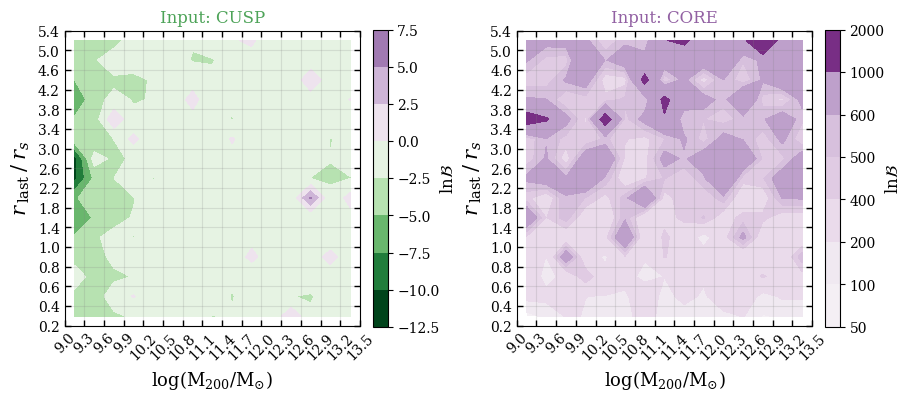

In [87]:
fig,ax1,ax2 = get_axes(0.4)
lnz_n,lnz_c = get_bf(dmo,20)
print ('min,max of all i/p cusp : ',np.around(np.min(lnz_n),2), np.around(np.max(lnz_n),2))
print ('min,max of all i/p core : ',np.around(np.min(lnz_c),2), np.around(np.max(lnz_c),2))
print ('----------------------------')
bfn = np.mean(lnz_n,axis = 2).copy()
print ('min,max of mean i/p cusp : ',np.around(np.min(bfn),2),np.around(np.max(bfn),2))
cn = ax1.contourf(LM,RN,bfn, cmap = pa.prgn_r,vmin = np.min(bfn), vmax = np.abs(np.min(bfn)))
cb = fig.colorbar(cn, ax = ax1, fraction = 0.046, pad = 0.04)
cb.set_label('$\mathrm{ln}\mathcal{B}$',size = 12,labelpad = 0)

bfs = np.mean(lnz_c,axis = 2).copy()
print ('min,max of mean i/p core : ',np.around(np.min(bfs),2),np.around(np.max(bfs),2))
levels = [50,100,200,400,500,600,1000,2000]
cn = ax2.contourf(LM,RN,bfs, cmap = pa.prgn_r,vmin = -np.max(bfs), vmax = np.max(bfs),levels = levels)
cb = fig.colorbar(cn, ax = ax2, fraction = 0.046, pad = 0.04,extend = 'both')
cb.set_ticks(levels)
cb.set_label('$\mathrm{ln}\mathcal{B}$',size = 12,labelpad = 0)
plt.savefig('../Output/reliability/DMO_mean_lnB_ensemble.pdf',bbox_inches = 'tight',dpi = 300)

min,max of median i/p cusp :  -5.47 -1.25
min,max of median i/p core :  39.76 657.69


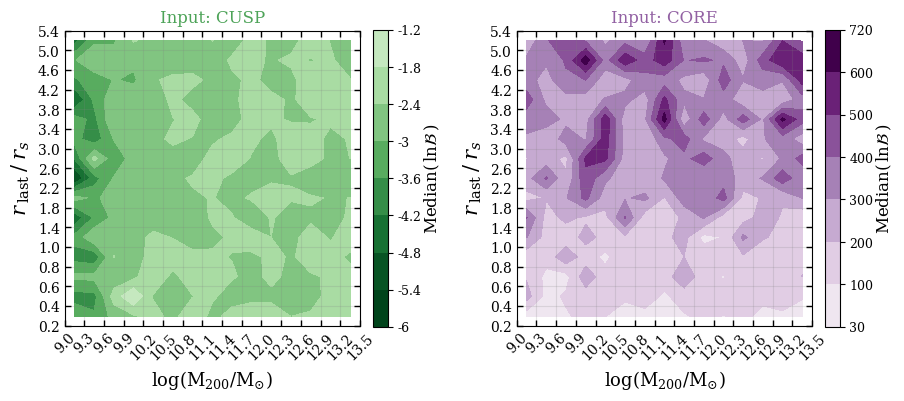

In [15]:
fig,ax1,ax2 = get_axes(0.4)
# ax1.set_title('')
# ax2.set_title('')
lnz_n,lnz_c = get_bf(dmo,20)
bfn = np.median(lnz_n,axis = 2).copy()
print ('min,max of median i/p cusp : ',np.around(np.min(bfn),2),np.around(np.max(bfn),2))
cn = ax1.contourf(LM,RN,bfn, cmap = pa.prgn_r,vmin = np.min(bfn), vmax = np.abs(np.min(bfn)))
cb = fig.colorbar(cn, ax = ax1, fraction = 0.046, pad = 0.04, )
cb.set_label(r'$\mathrm{Median}(\,\mathrm{ln}\mathcal{B}\,)$',size = 12,labelpad = 1)
levels = [-6,-5.4,-4.8,-4.2,-3.6,-3,-2.4,-1.8,-1.2]
cb.set_ticks(levels)
cb.set_ticklabels(levels, size = 9)
# ax1.contour(LM,RN,bfn,levels = [-2.5,0], colors = ['k'])

bfs = np.median(lnz_c,axis = 2).copy()
print ('min,max of median i/p core : ',np.around(np.min(bfs),2),np.around(np.max(bfs),2))
levels = [30,100,200,300,400,500,600,720]
cn = ax2.contourf(LM,RN,bfs, cmap = pa.prgn_r,vmin = -np.max(bfs), vmax = np.max(bfs),levels = levels)
cb = fig.colorbar(cn, ax = ax2, fraction = 0.046, pad = 0.04,extend = 'both')
cb.set_ticks(levels)
cb.set_ticklabels(levels, size = 9)
cb.set_label(r'$\mathrm{Median}(\,\mathrm{ln}\mathcal{B}\,)$',size = 12,labelpad = 1)
plt.savefig('../Output/reliability/DMO_median_lnB_ensemble.pdf',bbox_inches = 'tight',dpi = 300)

min,max of median i/p cusp :  -4.51 -1.06
min,max of median i/p core :  2.87 280.54


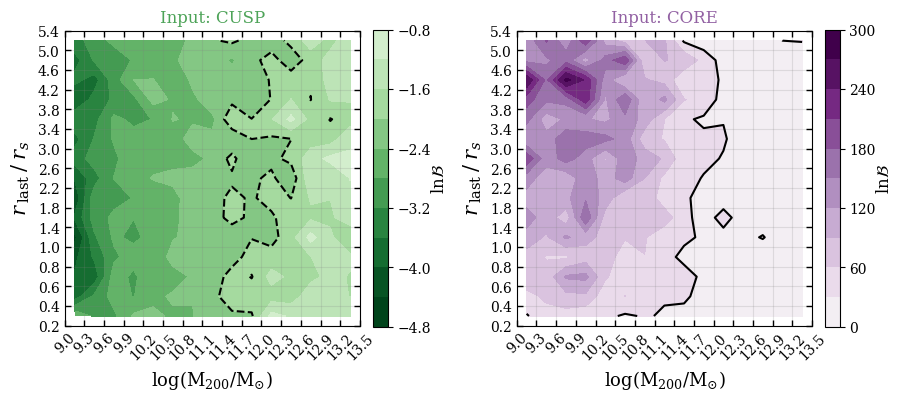

In [131]:
fig,ax1,ax2 = get_axes(0.4)
lnz_n,lnz_c = get_bf(bry,50)
bfn = np.median(lnz_n,axis = 2).copy()
print ('min,max of median i/p cusp : ',np.around(np.min(bfn),2),np.around(np.max(bfn),2))
levels = 10
cn = ax1.contourf(LM,RN,bfn, cmap = pa.prgn_r,vmin = np.min(bfn), vmax = np.abs(np.min(bfn)),levels = levels)
cb = fig.colorbar(cn, ax = ax1, fraction = 0.046, pad = 0.04)
cb.set_label('$\mathrm{ln}\mathcal{B}$',size = 12,labelpad = 0)
ax1.contour(LM,RN,bfn,levels = [-2,0],colors = ['k'])

bfs = np.median(lnz_c,axis = 2).copy()
print ('min,max of median i/p core : ',np.around(np.min(bfs),2),np.around(np.max(bfs),2))
# levels = [0,3,5,10,100,200,300]
levels = 10
cn = ax2.contourf(LM,RN,bfs, cmap = pa.prgn_r,vmin = -np.max(bfs), vmax = np.max(bfs),levels = levels)
cb = fig.colorbar(cn, ax = ax2, fraction = 0.046, pad = 0.04,extend = 'both')
# cb.set_ticks(levels)
cb.set_label('$\mathrm{ln}\mathcal{B}$',size = 12,labelpad = 0)
ax2.contour(LM,RN,bfs,levels = [0,30],colors = ['k'])
# plt.savefig('../Output/reliability/BRY_median_lnB_ensemble.pdf',bbox_inches = 'tight',dpi = 300)

In [35]:
def rela(lbf,ipm):
    if ipm == 'cusp':
        if lbf <= -1:
            ri = 1
        else:
            ri = 0
    if ipm == 'core':
        if lbf >= 5:
            ri = 1
        else:
            ri = 0
    return ri
def Rela(gdict,Ngals):
    Rn,Rc = np.zeros([15,15,Ngals]),np.zeros([15,15,Ngals])
    for model in ['N','S']:
        ipm = 'cusp' if model == 'N' else 'core'
        for lm_i in range(15):
            for rn_i in range(15):
                for i in range(Ngals):
                    gal = '%i_%i_%s_gal_%i'%(lm_i,rn_i,model,i)
                    dlz = gdict[gal]['core_fit']['lnZ'] - gdict[gal]['cusp_fit']['lnZ']
                    ri = rela(dlz,ipm)
                    if model == 'N':
                        Rn[lm_i,rn_i,i] = ri
                    elif model == 'S':
                        Rc[lm_i,rn_i,i] = ri
    return np.sum(Rn,axis = 2)/float(Ngals),np.sum(Rc,axis = 2)/float(Ngals)

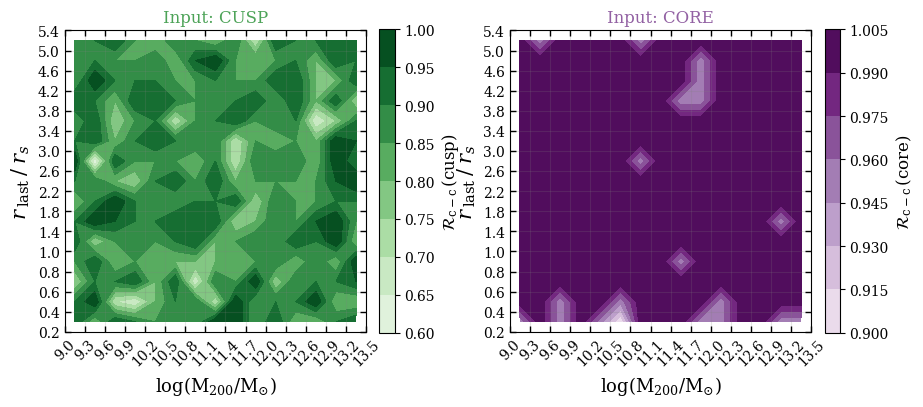

In [36]:
Rn,Rc = Rela(dmo,20)
fig,ax1,ax2 = get_axes(0.35)
cn = ax1.contourf(LM,RN,Rn,cmap = pa.gn_r)
cb = fig.colorbar(cn,ax = ax1, fraction = 0.046,pad = 0.04)
cb.set_label('$\mathcal{R}_\mathrm{c-c}\,\mathrm{(cusp)}$',size = 12)

cn = ax2.contourf(LM,RN,Rc,cmap = pa.pr)
cb = fig.colorbar(cn,ax = ax2, fraction = 0.046,pad = 0.04)
cb.set_label('$\mathcal{R}_\mathrm{c-c}\,\mathrm{(core)}$',size = 12)

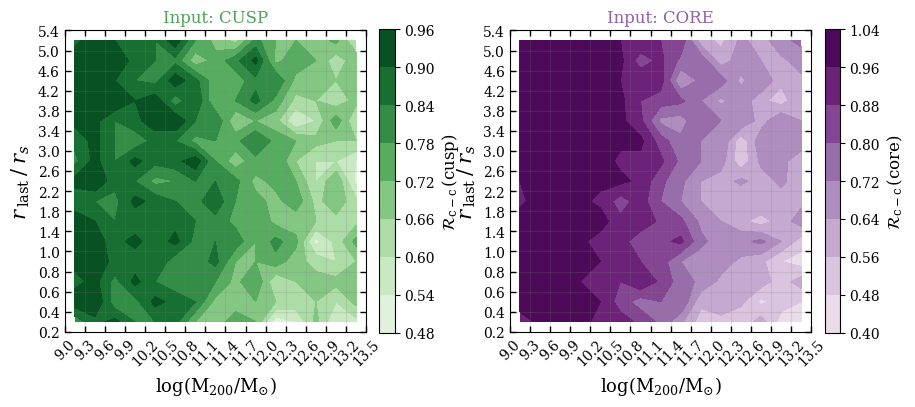

In [53]:
Rn,Rc = Rela(bry,50)
fig,ax1,ax2 = get_axes(0.35)
cn = ax1.contourf(LM,RN,Rn,cmap = pa.gn_r)
cb = fig.colorbar(cn,ax = ax1, fraction = 0.046,pad = 0.04)
cb.set_label('$\mathcal{R}_\mathrm{c-c}\,\mathrm{(cusp)}$',size = 12)

cn = ax2.contourf(LM,RN,Rc,cmap = pa.pr)
cb = fig.colorbar(cn,ax = ax2, fraction = 0.046,pad = 0.04)
cb.set_label('$\mathcal{R}_\mathrm{c-c}\,\mathrm{(core)}$',size = 12)

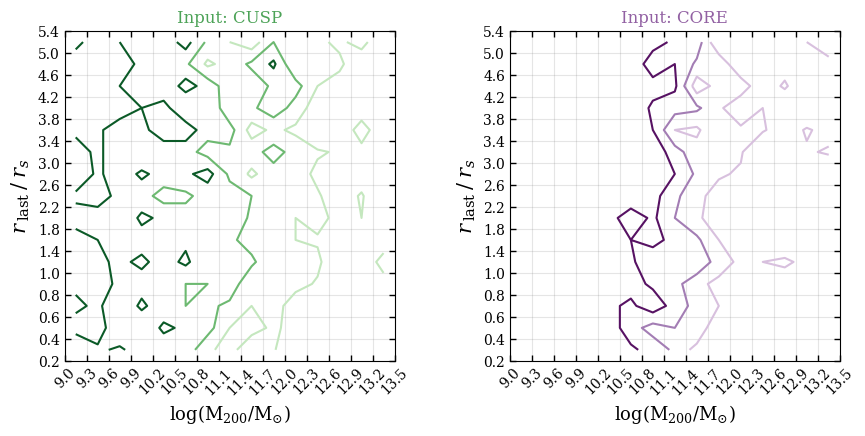

In [59]:
fig,ax1,ax2 = get_axes(0.35)

Rn,Rc = Rela(bry,50)
ax1.contour(LM,RN,Rn,levels = [0.9], colors = [pa.gn_r(0.9)])
ax2.contour(LM,RN,Rc,levels = [0.9], colors = [pa.pr(0.9)])

ax1.contour(LM,RN,Rn,levels = [0.8], colors = [pa.gn_r(0.5)])
ax2.contour(LM,RN,Rc,levels = [0.8], colors = [pa.pr(0.5)])

ax1.contour(LM,RN,Rn,levels = [0.7], colors = [pa.gn_r(0.2)])
ax2.contour(LM,RN,Rc,levels = [0.7], colors = [pa.pr(0.2)])

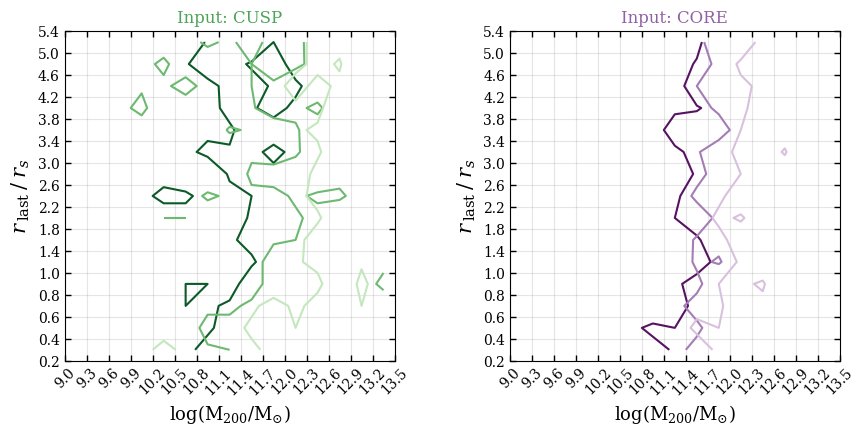

In [58]:
fig,ax1,ax2 = get_axes(0.35)

Rn,Rc = Rela(bry,50)
ax1.contour(LM,RN,Rn,levels = [0.8], colors = [pa.gn_r(0.9)])
ax2.contour(LM,RN,Rc,levels = [0.8], colors = [pa.pr(0.9)])

Rn,Rc = Rela(bry_1,50)
ax1.contour(LM,RN,Rn,levels = [0.8], colors = [pa.gn_r(0.5)])
ax2.contour(LM,RN,Rc,levels = [0.8], colors = [pa.pr(0.5)])

Rn,Rc = Rela(bry_p5,50)
ax1.contour(LM,RN,Rn,levels = [0.8], colors = [pa.gn_r(0.2)])
ax2.contour(LM,RN,Rc,levels = [0.8], colors = [pa.pr(0.2)])

In [593]:
def Zsmooth(oriX,oriY,oriZ,dN):
    X,Y,Z = oriX.copy(),oriY.copy(),oriZ.copy()
    X2,Y2,Z2 = X[::dN,::dN],Y[::dN,::dN],Z[::dN,::dN]
    Z_smooth =  interp.griddata(np.array([X2.ravel(),Y2.ravel()]).T,Z2.ravel(),(X,Y),method='cubic')
    return Z_smooth

def Delsmall(cn,diametercutoff = 4):
    for level in cn.collections:
        for kp,path in reversed(list(enumerate(level.get_paths()))):
            verts = path.vertices
            diameter = np.max(verts.max(axis = 0) - verts.min(axis = 0))

            if diameter < diametercutoff:
                del(level.get_paths()[kp])
    return cn

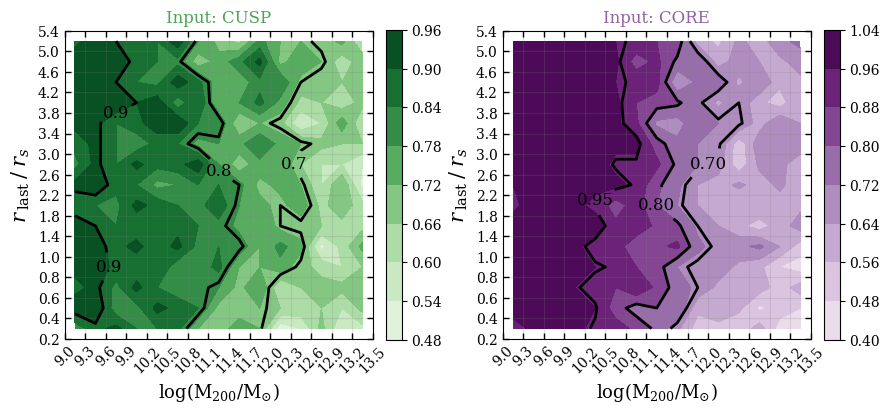

In [476]:
fig,ax1,ax2 = get_axes(0.3)
Rn,Rc = Rela(bry,50)
Clr = lambda clr,l,r = 0.2: [clr(r*(i+1)) for i in range(l)]
cn = ax1.contourf(LM,RN,Rn, cmap = pa.gn_r)
cb = fig.colorbar(cn,ax = ax1, fraction = 0.046, pad = 0.04)
cn = ax1.contour(LM,RN,Rn,levels = [0.7,0.8,0.9], colors = 'k',linewidths = 2)
Delsmall(cn)
clabels = ax1.clabel(cn, inline = True, colors = 'k', fontsize = 12, rightside_up = True)
for cl in clabels:
    cl.set_rotation(0)

cn = ax2.contourf(LM,RN,Rc, cmap = pa.pr)
fig.colorbar(cn,ax = ax2, fraction = 0.046,pad = 0.04)
cn = ax2.contour(LM,RN,Rc,levels = [0.7,0.8,0.95], colors = 'k',linewidths = 2)
Delsmall(cn,4)
clabels = ax2.clabel(cn, inline = True, colors = 'k', fontsize = 12, rightside_up = True)
for cl in clabels:
    cl.set_rotation(0)
    
plt.savefig('../Output/reliability/Bry_M200_rsize_1.pdf',bbox_inches = 'tight',dpi = 300)

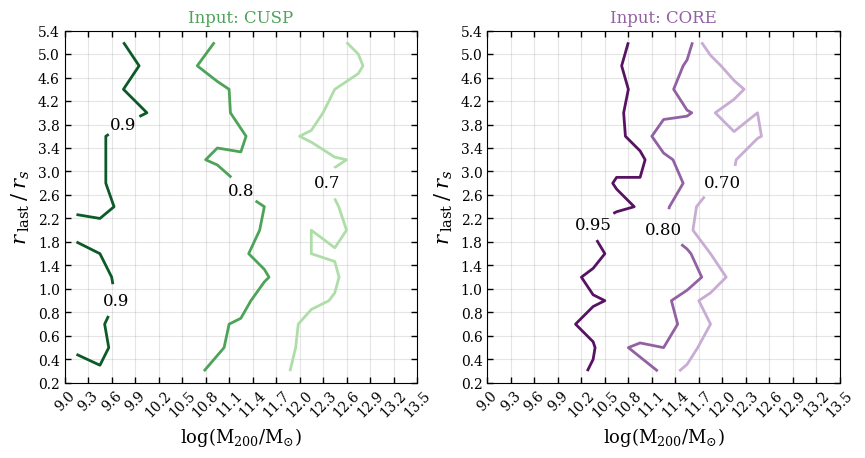

In [240]:
fig,ax1,ax2 = get_axes(0.2)

cn = ax1.contour(LM,RN,Rn,levels = [0.7,0.8,0.9], colors = Clr(pa.gn_r,3,0.3),linewidths = 2)
Delsmall(cn)
clabels = ax1.clabel(cn, inline = True, colors = 'k', fontsize = 12, rightside_up = True)
for cl in clabels:
    cl.set_rotation(0)
    
cn = ax2.contour(LM,RN,Rc,levels = [0.7,0.8,0.95], colors = Clr(pa.pr,3,0.3),linewidths = 2)
Delsmall(cn,4)
clabels = ax2.clabel(cn, inline = True, colors = 'k', fontsize = 12, rightside_up = True)
for cl in clabels:
    cl.set_rotation(0)

In [253]:
lsig_edges = np.array([-2,-1,-0.5,0,0.5,1,1.5,2.,2.25,2.5,2.75,3.,3.5,4.,4.5,5])
lsigs = 0.5*(lsig_edges[:-1]+lsig_edges[1:])
LS = [[lsigs[i] for j in range(15)] for i in range(15)]
LS = np.array(LS)

In [342]:
def get_lsaxes(wspace = 0.2):
    fig,axs = plt.subplots(1,2, figsize = (10,5),gridspec_kw = {'wspace':wspace})
    for ax in axs:
        ax.imshow(data, alpha = 0.)
        ax.set_xticks(np.arange(-0.5,15.5,1))
        ax.set_xticklabels(lsig_edges,rotation = 45)
        ax.set_yticks(np.arange(-0.5,15.5,1))
        ax.set_yticklabels(new_radius)
        ax.tick_params(axis = 'both',direction = 'in',right = True,top = True, width = 1,length = 4)
        ax.grid(ls = '-',color = 'grey',alpha = 0.2)
        ax.set_xlabel('log($\Sigma_0\,/\,\mathrm{M_{\odot}\,pc^{-2}}$)',size = 13)
        ax.set_ylabel('$r_{\:\mathrm{last}}\:/\:r_s$',size = 15)
        ax.set_ylim(14.5,-0.5)
        ax.set_xlim(-0.5,14.5)
    axs[0].set_title('Input: CUSP', color = pa.green)
    axs[1].set_title('Input: CORE', color = pa.purple)
    return fig,axs[0],axs[1]

def get_lmlsaxes(wspace = 0.2):
    fig,axs = plt.subplots(1,2, figsize = (10,5),gridspec_kw = {'wspace':wspace})
    for ax in axs:
        ax.imshow(data, alpha = 0.)
        ax.set_xticks(np.arange(-0.5,15.5,1))
        ax.set_xticklabels(masses,rotation = 45)
        ax.set_yticks(np.arange(-0.5,15.5,1))
        ax.set_yticklabels([lsig_edges[-i - 1] for i in range(len(lsig_edges))])
        ax.tick_params(axis = 'both',direction = 'in',right = True,top = True, width = 1,length = 4)
        ax.grid(ls = '-',color = 'grey',alpha = 0.2)
        ax.set_xlabel('log($\mathrm{M_{200}/M_{\odot}}$)',size = 13)
        ax.set_ylabel('log($\Sigma_0\,/\,\mathrm{M_{\odot}\,pc^{-2}}$)',size = 13)
        ax.set_ylim(14.5,-0.5)
        ax.set_xlim(-0.5,14.5)
    axs[0].set_title('Input: CUSP', color = pa.green)
    axs[1].set_title('Input: CORE', color = pa.purple)
    return fig,axs[0],axs[1]

In [313]:
def Relals(gdict,Ngals,lsigs = lsigs,lsig_edges = lsig_edges):
    Rls_n,Rls_c = np.zeros([15,15]),np.zeros([15,15])
    for ls_i in range(15):
        for rn_i in range(15):
            rels_n,rels_c = 0,0
            ngal_n,ngal_c = 0,0
            for gal in gdict.keys():
                rn = gdict[gal]['original']['rn']
                ls = gdict[gal]['original']['lsig'] - 6
                lz = gdict[gal]['core_fit']['lnZ'] - gdict[gal]['cusp_fit']['lnZ']
                if (radius[rn_i] <= rn < radius[rn_i+1]) and (lsig_edges[ls_i] <= ls < lsig_edges[ls_i+1]):
                    if 'N' in gal:
                        rels_n += rela(lz,'cusp')
                        ngal_n += 1
                    elif 'S' in gal:
                        rels_c += rela(lz,'core')
                        ngal_c += 1
            if ngal_n:
                Rls_n[ls_i,rn_i] = rels_n/float(ngal_n)
            if ngal_c:
                Rls_c[ls_i,rn_i] = rels_c/float(ngal_c)
    return Rls_n,Rls_c


def Relalmls(gdict,Ngals,lsigs = lsigs,lsig_edges = lsig_edges):
    Rls_n,Rls_c = np.zeros([15,15]),np.zeros([15,15])
    for lm_i in range(15):
        for ls_i in range(15):
            rels_n,rels_c = 0,0
            ngal_n,ngal_c = 0,0
            for gal in gdict.keys():
                lm = gdict[gal]['original']['lm']
                ls = gdict[gal]['original']['lsig'] - 6
                lz = gdict[gal]['core_fit']['lnZ'] - gdict[gal]['cusp_fit']['lnZ']
                if (masses[lm_i] <= lm < masses[lm_i+1]) and (lsig_edges[ls_i] <= ls < lsig_edges[ls_i+1]):
                    if 'N' in gal:
                        rels_n += rela(lz,'cusp')
                        ngal_n += 1
                    elif 'S' in gal:
                        rels_c += rela(lz,'core')
                        ngal_c += 1
            if ngal_n:
                Rls_n[lm_i,ls_i] = rels_n/float(ngal_n)
            if ngal_c:
                Rls_c[lm_i,ls_i] = rels_c/float(ngal_c)
    return Rls_n,Rls_c

In [266]:
Rls_n,Rls_c = Relals(bry,50)

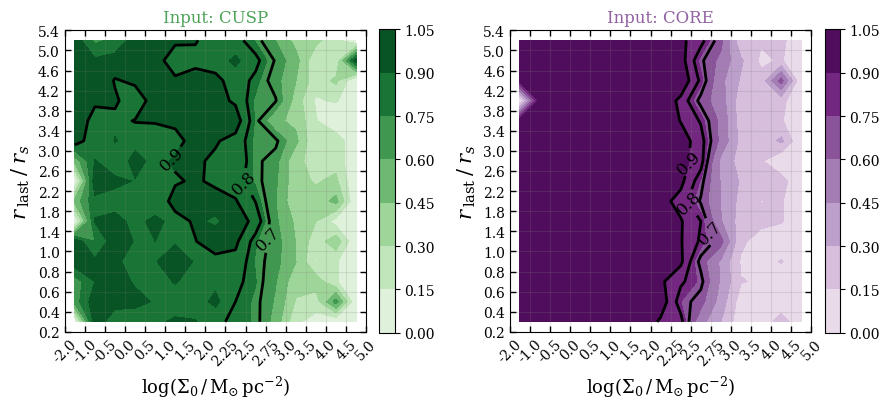

In [475]:
fig,ax1,ax2 = get_lsaxes(0.35)
cn = ax1.contourf(LM,RN,Rls_n,cmap = pa.gn_r)
fig.colorbar(cn,ax = ax1, fraction = 0.046,pad = 0.04)
cn = ax1.contour(LM,RN,Rls_n,levels = [0.7,0.8,0.9], colors = 'k',linewidths = 2)
Delsmall(cn,10)
manual_locations = [(5,6),(8.6,7),(12,10)]
clabels = ax1.clabel(cn, inline = True, colors = 'k', fontsize = 12, 
                     rightside_up = True,manual = manual_locations)
for cl in clabels:
    cl.set_rotation(45)

cn = ax2.contourf(LM,RN,Rls_c,cmap = pa.pr)
fig.colorbar(cn,ax = ax2, fraction = 0.046,pad = 0.04)
cn = ax2.contour(LM,RN,Rls_c,levels = [0.7,0.8,0.9], colors = 'k',linewidths = 2)
Delsmall(cn,4)
manual_locations = [(8,6),(8.6,8),(12,9)]
clabels = ax2.clabel(cn, inline = True, colors = 'k', fontsize = 12, 
                     rightside_up = True,manual = manual_locations)
for cl in clabels:
    cl.set_rotation(45)
    
plt.savefig('../Output/reliability/Bry_lsig_rsize_1.pdf',bbox_inches = 'tight',dpi = 300)

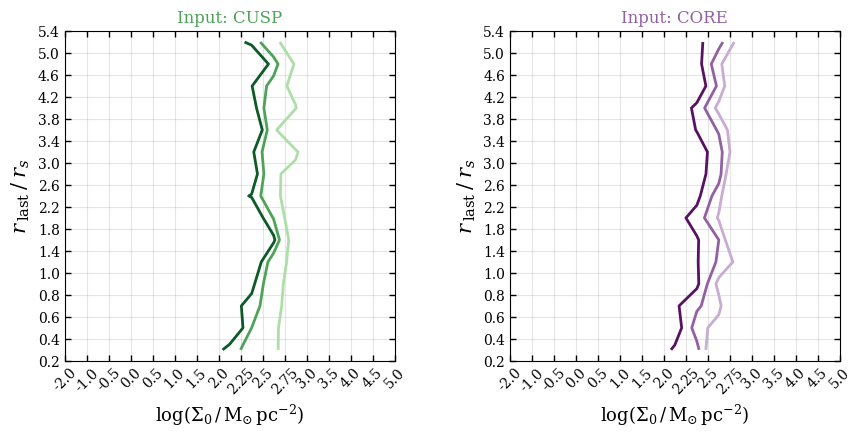

In [333]:
fig,ax1,ax2 = get_lsaxes(0.35)
cn = ax1.contour(LM,RN,Rls_n,levels = [0.7,0.8,0.85], colors = Clr(pa.gn_r,3,0.3),linewidths = 2)
Delsmall(cn,7)

cn = ax2.contour(LM,RN,Rls_c,levels = [0.7,0.8,0.9], colors = Clr(pa.pr,3,0.3),linewidths = 2)
Delsmall(cn,2)

In [317]:
Rlmls_n,Rlmls_c = Relalmls(bry,50)

In [555]:
lm = np.linspace(9.,13.5,100)
lms = pnp.lmstar_behroozi_19(lm)
sig = 1.2
lms_low = lms - sig*0.3
lmg_low = 0.52*lms_low + 4.44 - sig*0.47
lrg_low = 0.59*lmg_low - 4.80 - sig*0.14
lrd_low = 0.91*lrg_low - 0.38 - sig*0.21
lms_hig = lms + sig*0.3
lmg_hig = 0.52*lms_hig + 4.44 + sig*0.47
lrg_hig = 0.59*lmg_hig - 4.80 + sig*0.14
lrd_hig = 0.91*lrg_hig - 0.38 + sig*0.21
lsig_low = np.log10(pp.sig_exp(lms_low, 10**lrd_hig))-6
lsig_hig = np.log10(pp.sig_exp(lms_hig, 10**lrd_low))-6
LMi = sp.interpolate.interp1d(mass,np.arange(0,15,1),fill_value = (0,14),bounds_error = False)
LSi = sp.interpolate.interp1d(lsigs,np.arange(14,-1,-1),fill_value = (14,0),bounds_error = False)

In [540]:
LSIG,LMM = [],[]
for gal in bry:
    lsig = bry[gal]['original']['lsig'] - 6
    lm = bry[gal]['original']['lm']
    LSIG.append(lsig)
    LMM.append(lm)

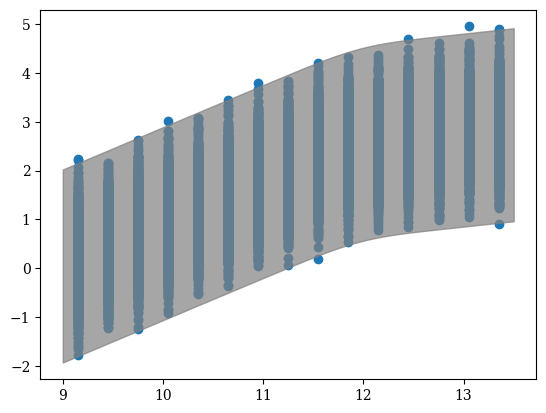

In [556]:
plt.scatter(LMM,LSIG)
plt.fill_between(lm,lsig_low,lsig_hig, color = 'grey',alpha = 0.7)
# plt.fill_between(lm,ls,np.ones(len(lm))*0, color = 'grey',alpha = 0.7)

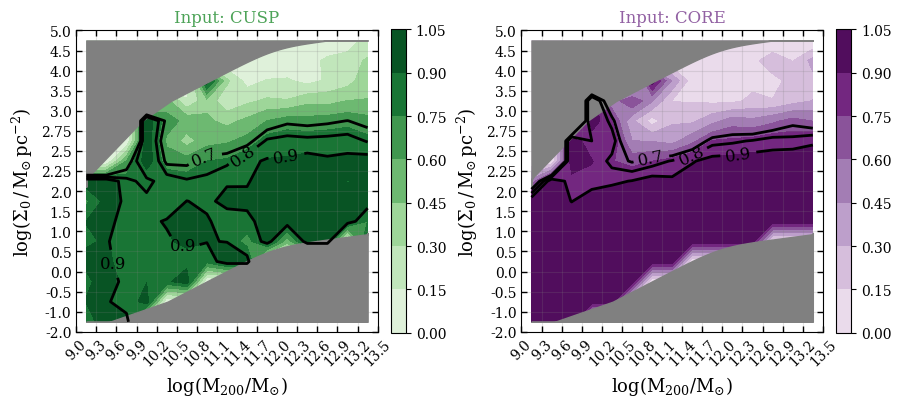

In [594]:
fig,ax1,ax2 = get_lmlsaxes(0.35)
cn = ax1.contourf(LM,RN,Rlmls_n,cmap = pa.gn_r)
fig.colorbar(cn,ax = ax1, fraction = 0.046,pad = 0.04)
cn = ax1.contour(LM,RN,Rlmls_n,levels = [0.7,0.8,0.9], colors = 'k',linewidths = 2)
Delsmall(cn,13)
cn2 = ax1.contour(LM,RN,Rlmls_n,levels = [0.9], colors = 'k',linewidths = 2)
Delsmall(cn2,3)
clabels = ax1.clabel(cn, inline = True, colors = 'k', fontsize = 12, 
                     rightside_up = True,manual = [(8,6),(6,6)])
clabels = ax1.clabel(cn2, inline = True, colors = 'k', fontsize = 12, 
                     rightside_up = True,manual = [(10,6),(5,10),[2,11]])
for cl,i in zip(clabels,range(3)):
    if i == 0:
        pass
    else:
        cl.set_rotation(0)



cn = ax2.contourf(LM,RN,Rlmls_c,cmap = pa.pr)
fig.colorbar(cn,ax = ax2, fraction = 0.046,pad = 0.04)
cn = ax2.contour(LM,RN,Rlmls_c,levels = [0.7,0.8,0.9], colors = 'k',linewidths = 2)
Delsmall(cn,12)
manual_locations = [(6,6),(8,5.8),(11,9)]
clabels = ax2.clabel(cn, inline = True, colors = 'k', fontsize = 12, 
                     rightside_up = True,manual = manual_locations)

for ax in [ax1,ax2]:
    ax.fill_between(LMi(lm),LSi(lsig_low),np.ones(len(lm))*14, color = 'grey',alpha = 1)
    ax.fill_between(LMi(lm),LSi(lsig_hig),np.ones(len(lm))*0, color = 'grey',alpha = 1)
    
plt.savefig('../Output/reliability/Bry_M200_lsig_1.pdf',bbox_inches = 'tight',dpi = 300)

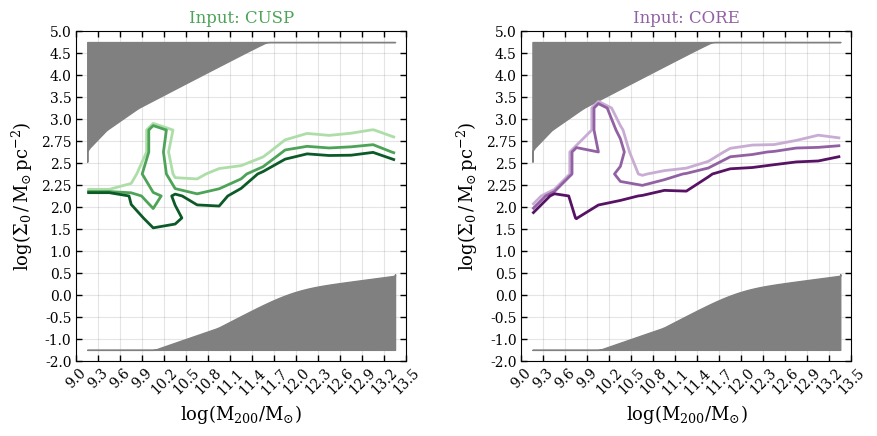

In [415]:
fig,ax1,ax2 = get_lmlsaxes(0.35)
cn = ax1.contour(LM,RN,Rlmls_n,levels = [0.7,0.8,0.85], colors = Clr(pa.gn_r,3,0.3),linewidths = 2)
Delsmall(cn,14)

cn = ax2.contour(LM,RN,Rlmls_c,levels = [0.7,0.8,0.9], colors = Clr(pa.pr,3,0.3),linewidths = 2)
Delsmall(cn,14)
for ax in [ax1,ax2]:
    ax.fill_between(LMi(lm),LSi(lsig_low),np.ones(len(lm))*14, color = 'grey')
    ax.fill_between(LMi(lm),LSi(lsig_hig),np.ones(len(lm))*0, color = 'grey')

In [ ]:
sparc_lm,sparc_ls,sparc_rn = [],[],[]


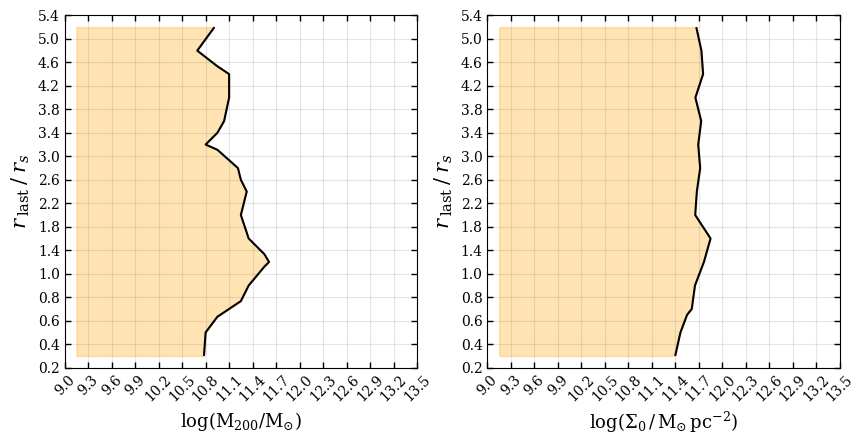

In [607]:
fig,ax1,ax2 = get_axes(0.2)
ax2.set_xlabel('log($\Sigma_0\,/\,\mathrm{M_{\odot}\,pc^{-2}}$)',size = 13)

Rlm,Rls = np.zeros([15,15]),np.zeros([15,15])
for i in range(15):
    for j in range(15):
        Rlm[i,j] = np.min([Rn[i,j],Rc[i,j]])
        Rls[i,j] = np.min([Rls_n[i,j],Rls_c[i,j]])

cn = ax1.contour(LM,RN,Rlm,levels = [0.8],colors = 'k')
cn = Delsmall(cn,4)
level = cn.collections[0]
v = level.get_paths()[0].vertices
x,y = v[:,0],v[:,1]
ax1.fill_betweenx(y,x,np.zeros(len(x)),color = 'orange',alpha = 0.3)


cn = ax2.contour(LM,RN,Rls,levels = [0.8],colors = 'k')
Delsmall(cn,6)
level = cn.collections[0]
v = level.get_paths()[0].vertices
x,y = v[:,0],v[:,1]
ax2.fill_betweenx(y,x,np.zeros(len(x)),color = 'orange',alpha = 0.3)

for ax in [ax1,ax2]:
    ax.set_title('')